<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-regression-was-used-to-classify-people-who-drank-alcohol-or-not" data-toc-modified-id="Logistic-regression-was-used-to-classify-people-who-drank-alcohol-or-not-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic regression was used to classify people who drank alcohol or not</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Dataset-input" data-toc-modified-id="Dataset-input-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Dataset input</a></span></li><li><span><a href="#EDA-for-dataset" data-toc-modified-id="EDA-for-dataset-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>EDA for dataset</a></span></li><li><span><a href="#map-categorical-variables-to-numerical-variables" data-toc-modified-id="map-categorical-variables-to-numerical-variables-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>map categorical variables to numerical variables</a></span></li></ul></li><li><span><a href="#logistic-regression-model" data-toc-modified-id="logistic-regression-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>logistic regression model</a></span><ul class="toc-item"><li><span><a href="#Split-the-dataset" data-toc-modified-id="Split-the-dataset-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Split the dataset</a></span></li><li><span><a href="#Use-logistic-model" data-toc-modified-id="Use-logistic-model-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Use logistic model</a></span></li></ul></li><li><span><a href="#Measure-Model-Accuracy" data-toc-modified-id="Measure-Model-Accuracy-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Measure Model Accuracy</a></span></li><li><span><a href="#Improve-model-accuracy" data-toc-modified-id="Improve-model-accuracy-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Improve model accuracy</a></span><ul class="toc-item"><li><span><a href="#Use-L1-regularization-to-improve-it" data-toc-modified-id="Use-L1-regularization-to-improve-it-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Use L1 regularization to improve it</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# Logistic regression was used to classify people who drank alcohol or not

## Introduction

In this project, I explore the use of logistic regression model to predict whether individuals drink or not based on a comprehensive set of features. The dataset encompasses various health and demographic parameters such as sex, age, height, weight, cholesterol levels, blood pressure, and lifestyle habits like smoking. By utilizing logistic regression, we aim to create a predictive model that can identify the likelihood of an individual being a drinker or a non-drinker based on these features.


## Data analysis

###  Dataset input

I improt packages that need to use for EDA and logistic regression model

In [14]:
# import package 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Dataset have 23 labels and data source from [Kaggle](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset/data) and can see include 991346 rows.

In [15]:
dataset = pd.read_csv('C:/Users/Eurous/Desktop/smoking_driking_dataset_Ver01.csv')
dataset

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


Determine dataset each column meaning:  

Sex ：   male, female  
age ：            round up to 5 years  
height ：        round up to 5 cm[cm]  
weight ：       [kg]  
sight_left ：      eyesight(left)  
sight_right ：     eyesight(right)  
hear_left ：      hearing left, 1(normal), 2(abnormal)  
hear_right ：      hearing right, 1(normal), 2(abnormal)  
SBP ：     Systolic blood pressure[mmHg]  
DBP ：          Diastolic blood pressure[mmHg]  
BLDS ：          BLDS or FSG(fasting blood glucose)[mg/dL]  
tot_chole ：      total cholesterol[mg/dL]  
HDL_chole ：      HDL cholesterol[mg/dL]	HDL  
LDL_chole ：      LDL cholesterol[mg/dL]	LDL  
triglyceride ：     triglyceride[mg/dL]  
hemoglobin ：       hemoglobin[g/dL]  
urine_protein：     protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)  
serum_creatinine ：   serum(blood) creatinine[mg/dL]  
SGOT_AST ：       SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]T  
SGOT_ALT ：       ALT(Alanine transaminase)[IU/L]  
gamma_GTP ：       y-glutamyl transpeptidase[IU/L]  
SMK_stat_type_cd ：    Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)  
DRK_YN ：          Drinker or Not

### EDA for dataset

Use EDA to analysis data first.

In [16]:
# Display the first few rows of the dataset
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


In [17]:
# Summary statistics of numerical columns
dataset.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [18]:
# including data types and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglobin        99

According to data columns (labels), we can see that these data represent human health information, such as height and weight, blood pressure, blood protein content, etc., including 21 columns of numerical values and 2 columns of object values. The dataset includes three categorical labels, including gender, smoking, and drinking.

In [19]:
# checking for null values
dataset.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

We can see dataset not include null value. The data set is complete.

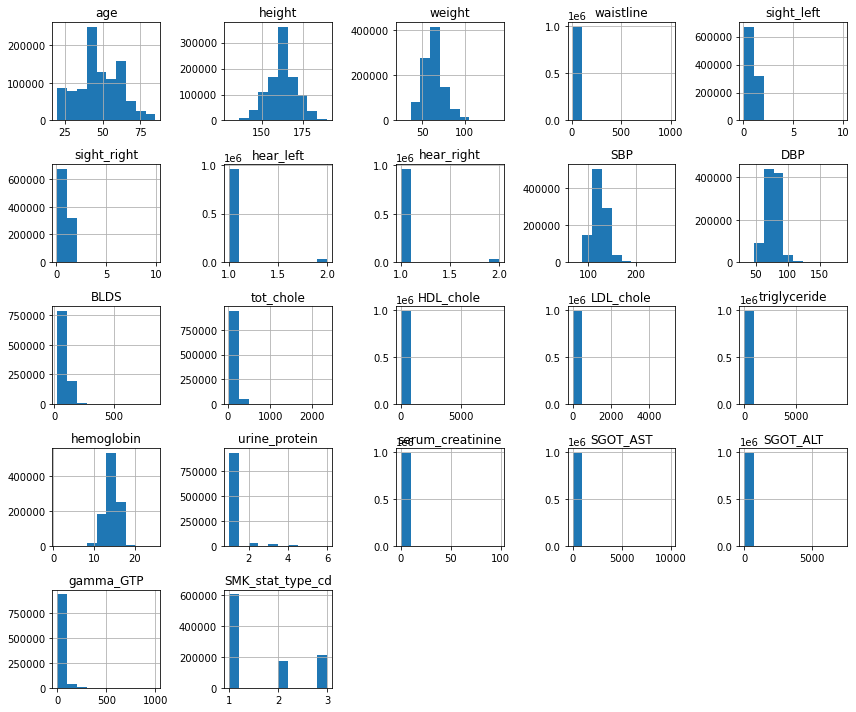

In [20]:
# Visualization for numerical values
dataset.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

According to the histogram for each numerical labels, we can intuitively see the distribution of data. For example, the age distribution is between 20 and 80 years old, with 40-45 years old being the most. The height of people up to about 160 cm is the most, and the weight is generally distributed between 50kg and 80kg.For hemoglobin content, blood pressure, blood pressure and other medical data, you can see that the basic distribution is in a specific interval.

After that,visualization for categorical values separately.

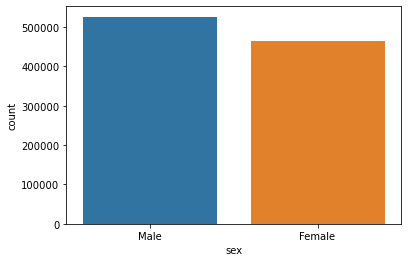

In [21]:
# Countplot for categorical features
sns.countplot(x='sex', data=dataset)
plt.show()

From the gender statistics chart, there are a little more male than female.

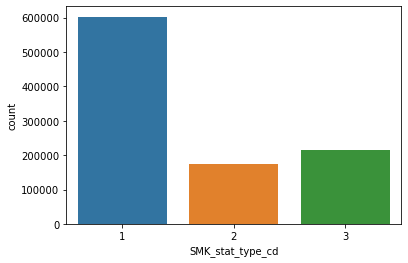

In [22]:
# Countplot for categorical features
sns.countplot(x='SMK_stat_type_cd', data=dataset)
plt.show()

Looking for Smoking state[ 1(never), 2(used to smoke but quit), 3(still smoke)],we can see non-smokers accounted for the majority, and regular smokers were slightly more numerous than occasional smokers.

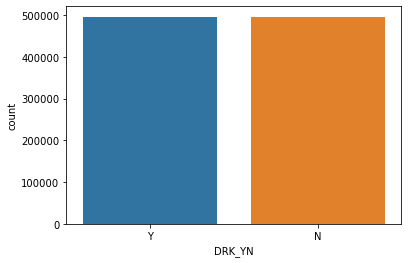

In [23]:
# Countplot for categorical features
sns.countplot(x='DRK_YN', data=dataset)
plt.show()

As follow drinking state plot, there are as many drinkers as non-drinkers.

### map categorical variables to numerical variables

Then I want to observe the correlation between the labels through heatmap especially observe these labels have a strong or weak correlation with whether they drink alcohol column. First of all need to map categorical variables to numerical variables. 

I first creat the dictionary for mapping, converted the object variable of yes and no into number 0 and 1, and then used the `replace` function to replace the original data with the transformed data. In this way we have a data set with the same data format.

In [24]:
# Create a dictionary for mapping
drink_mapping = {'Y': 1, 'N': 0}

# Use replace() method to apply the mapping
dataset['DRK_YN'] = dataset['DRK_YN'].replace(drink_mapping)

In [25]:
# Create a dictionary for_mapping 
sex_mapping = {'Male': 1.0, 'Female': 0.0}
# Use replace() method to apply the mapping
dataset['sex'] = dataset['sex'].replace(sex_mapping)

Draw heatmap to observe it!

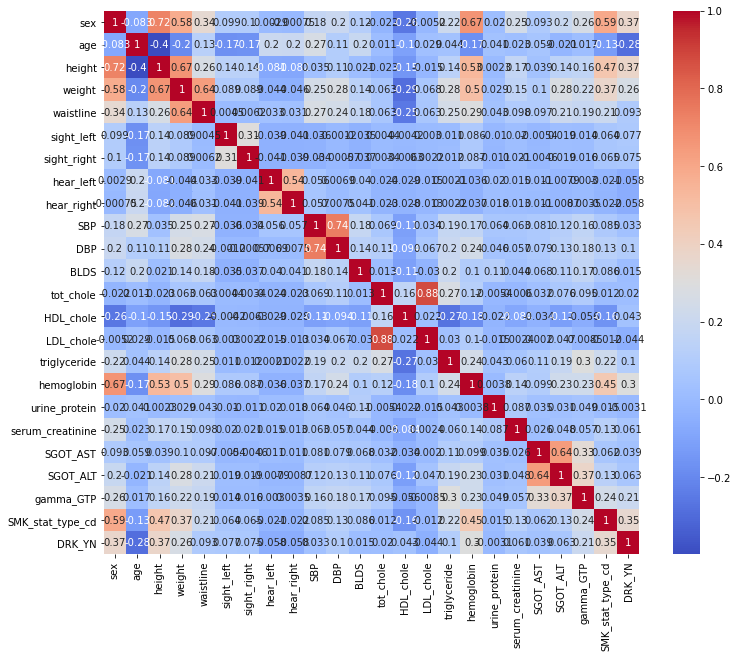

In [26]:
# Correlation matrix heatmap to visualize relationships between features
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Read it: the larger the number and darker the color the higher the correlation between the two variables. So follow the heatmap, we can see SDP & DBP, tot_chole & LDL_chole has higher relation.

It can be observed that sex and height has both the strongest correlation with drink type(0.37) compare to other labels, while smoke state also have a strong correlation with drinking type(0.35).

##  logistic regression model 

Then, fit logistic regression model to predict and first step for Split the dataset.

### Split the dataset 

In [27]:
# Separate features and target variable
features = dataset[['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 
                 'hear_left', 'hear_right', 'SBP', 'LDL_chole', 'triglyceride', 'hemoglobin', 
                 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 
                 'SMK_stat_type_cd']]
target = dataset['DRK_YN']


In [28]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Use logistic model

In [29]:
# Initialize the logistic regression model
model = LogisticRegression()

In [30]:
# Train the model using the training data
model.fit(X_train, y_train)

C:\Anaconda3\numpy\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Make predictions on the test data
predictions = model.predict(X_test)

In [32]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
comparison_df 

,Actual,Predicted
676014,0,0
958905,0,1
472540,0,1
244194,1,1
88447,0,0
...,...,...
778854,1,1
81523,0,0
632475,0,1
96571,0,0


Comparing the predicted numbers with the real numbers, we can see that the results are not exactly the same.

<Figure size 720x432 with 0 Axes>

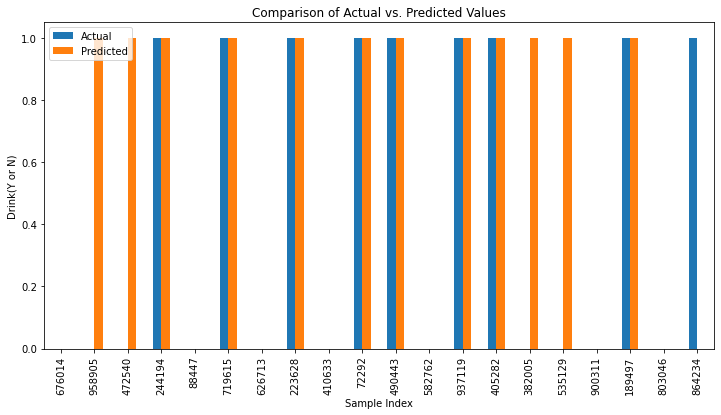

In [33]:
# Plot a bar chart to compare actual vs. predicted values
plt.figure(figsize=(10, 6))
comparison_df[:20].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Sample Index')
plt.ylabel('Drink(Y or N)')
plt.title('Comparison of Actual vs. Predicted Values')
plt.show()

Then plot a bar chart to compare actual and predicted values,it can be seen that at most 70 percent of the results are consistent.

Next,`accuracy_score` and `recall_score` is used to measure the precision of the model.

## Measure Model Accuracy

Performance Metrics was used to measure the accuracy of the model include `accuracy_score` and `recall_score`, `precision_score`  and `f1_score`

In [45]:
## Import the library and functions you need
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
## Accuracy
accuracy = accuracy_score(y_test,predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
## Precision
precision = precision_score(y_test,predictions)
print(f'precision: { precision * 100:.2f}%')
## Recall
recall = recall_score(y_test,predictions,average='binary')
print('Recall: %.3f' % recall)
## F1 Score
F_1 = f1_score(y_test,predictions,average='binary')
print('F1 score: %f' % F_1)

Accuracy: 71.19%
precision: 71.49%
Recall: 0.701
F1 score: 0.707650


Through the bar chart and the accuracy of calculation, it is found that the model does not fit very well, so it can be improved.

## Improve model accuracy

After doing some research (reading books on machine learning and online tutorial), I found that L1 regularization is helpful to improve the accuracy of logistic regression model. Please refer to my reflection for the specific theoretical part.

### Use L1 regularization to improve it 

But it runs very slowly and can take several minutes. I mentioned results for accuracy increase from 71.19% to 71.93% and recall score increase from 0.701 to 0.708. From the results, the accuracy of the model has been improved.

In [36]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with L1 regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0) # C is the inverse of regularization strength

In [37]:
# Train the model
model_l1.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [38]:
# Make predictions
predictions_l1 = model_l1.predict(X_test)

In [39]:
# Evaluate the model (calculate accuracy, etc.)
accuracy_l1 = model_l1.score(X_test, y_test)
accuracy_l1

0.7192616129520351

In [42]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions_l1, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.708


## Conclusion

This project delves into the realm of binary classification, focusing on predicting people's drinking behavior using logistic
regression.  The dataset, consisting of diverse health and lifestyle attributes, was subjected to exploratory data analysis (EDA)
to gain insights and understand patterns within the data.  The logistic regression model was trained on the processed dataset, 
considering features such as age, cholesterol levels, blood pressure, and smoking status, among others.

Through rigorous evaluation, the model's accuracy was measured using the Performance Metrics, which assesses its ability to correctly 
identify positive instances (drinkers) out of all actual positive instances in the dataset.  By employing this approach, we aimed 
to create an accurate and reliable predictive tool to discern individuals' drinking habits based on their health and lifestyle
characteristics.